In [4]:

import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## LSTM

In [2]:
df=pd.read_csv('boston.csv')
df

,Unnamed: 0,f1,f2,f3,f4,f5,class
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy
...,...,...,...,...,...,...,...
295,295,0.424106,0.092797,2.301373,2.301373,0.604564,seizure
296,296,0.101266,0.053133,2.301376,2.301376,0.637104,seizure
297,297,0.121906,0.089653,2.301379,2.301379,0.606438,seizure
298,298,0.341561,0.126592,2.301372,2.301372,0.600381,seizure


In [3]:
df2 = df.rename({'class': 'y'}, axis=1)
df2

,Unnamed: 0,f1,f2,f3,f4,f5,y
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy
...,...,...,...,...,...,...,...
295,295,0.424106,0.092797,2.301373,2.301373,0.604564,seizure
296,296,0.101266,0.053133,2.301376,2.301376,0.637104,seizure
297,297,0.121906,0.089653,2.301379,2.301379,0.606438,seizure
298,298,0.341561,0.126592,2.301372,2.301372,0.600381,seizure


In [4]:
df2['y'] = df2.y.map({'healthy': 0, 'seizure': 1, 'transation': 0})
df2


,Unnamed: 0,f1,f2,f3,f4,f5,y
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,0
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,0
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,0
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,0
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,0
...,...,...,...,...,...,...,...
295,295,0.424106,0.092797,2.301373,2.301373,0.604564,1
296,296,0.101266,0.053133,2.301376,2.301376,0.637104,1
297,297,0.121906,0.089653,2.301379,2.301379,0.606438,1
298,298,0.341561,0.126592,2.301372,2.301372,0.600381,1


In [47]:
df2.to_csv('bostonauto.csv')

In [5]:

X=df2.values

In [6]:
X=X[:,1:-1]
X

array([[0.8876206 , 0.18587486, 2.29947393, 2.29947393, 0.58139559],
       [0.78374388, 0.16379436, 2.29947989, 2.29947989, 0.58834032],
       [0.87587262, 0.15471405, 2.29947693, 2.29947693, 0.58980158],
       ...,
       [0.12190591, 0.08965272, 2.30137916, 2.30137916, 0.60643813],
       [0.34156111, 0.12659211, 2.30137162, 2.30137162, 0.60038083],
       [0.25939333, 0.09691405, 2.3013799 , 2.3013799 , 0.59970394]])

In [8]:
y=np.array(df2['y'])
Y=np_utils.to_categorical(y)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [12]:
np.shape(X_train)

(210, 5)

In [13]:
X_train = X_train.reshape(-1,5,1)
X_test = X_test.reshape(-1,5,1)
X_train.shape
X_train.shape

(210, 5, 1)

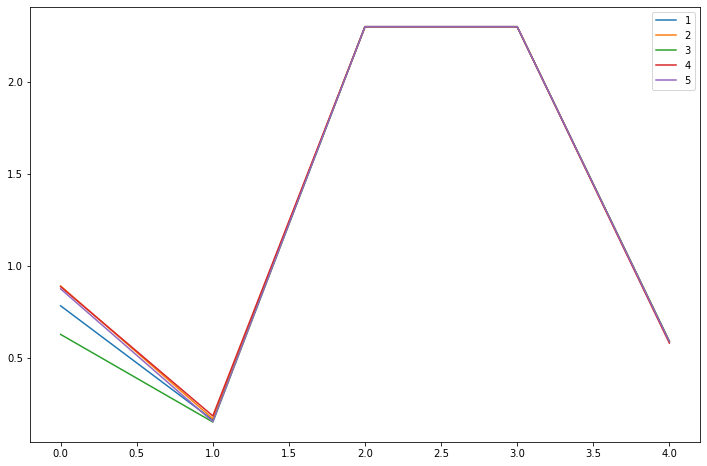

In [14]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

In [27]:
model = Sequential()
model.add(LSTM(56, input_shape=(5,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 56)             12992     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 56)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_3 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1140      
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [21]:
X=(X_train-X_train.mean())/X_train.std()
X=np.asarray(X).astype(np.float32)
Y=Y_train[:,1:]
Y=np.asarray(Y).astype(np.float32)

In [23]:
np.shape(X_train)

(210, 5, 1)

In [56]:
np.shape(X_train)

(240, 5, 1)

In [24]:
XT=(X_test-X_test.mean())/X_test.std()
XT=np.asarray(XT).astype(np.float32)
YT=Y_test[:,1:]
YT=np.asarray(YT).astype(np.float32)

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
hist = model.fit(X,Y,validation_data=(XT,YT),epochs = 20, batch_size=10,shuffle=False)

Epoch 1/20
21/21 [==============================] - 1s 35ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.6931 - val_accuracy: 0.3222
Epoch 2/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4714 - val_loss: 0.6931 - val_accuracy: 0.6778
Epoch 3/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5143 - val_loss: 0.6931 - val_accuracy: 0.3222
Epoch 4/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4857 - val_loss: 0.6931 - val_accuracy: 0.3222
Epoch 5/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5524 - val_loss: 0.6931 - val_accuracy: 0.3222
Epoch 6/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4905 - val_loss: 0.6931 - val_accuracy: 0.6778
Epoch 7/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.6931 - val_accuracy: 0.3222
Epoch 8/20
21/21 [=

## Autoencoder

In [13]:
#Autoencoder
def augment_data(labels, eeg_data): 
	import random
	# data_augmentation using white gaussian noise + shuffling
	for i in range(len(eeg_data)): 
		noise = np.random.normal(0, 0.1, len(eeg_data[0]))
		eeg_data.append([x + y for x, y in zip(eeg_data[i], noise)])
		labels.append(labels[i])

	combined = list(zip(labels, eeg_data))
	random.shuffle(combined)
	labels[:], eeg_data[:] = zip(*combined)

	return labels, eeg_data

In [14]:
def save_data(filepath, binary, augment): 
    from keras.utils import np_utils, plot_model
    csv_data = np.genfromtxt(filepath, delimiter=",")
    eeg_data = csv_data[1:]
    #print(eeg_data)
    labels = []
    cleaned_eeg_data = []
    if binary:  
        for i in range(len(eeg_data)):
            #seizure vs non-seizure only
            labels.append(0 if (eeg_data[i][-1] == 1) else 1)
            cleaned_eeg_data.append((eeg_data[i][:-1])[1:])
            
    else: 
        for i in range(len(eeg_data)):
            labels.append(eeg_data[i][-1]-1)
            cleaned_eeg_data.append((eeg_data[i][:-1])[1:])

    if augment: 
           labels, cleaned_eeg_data = augment_data(labels, cleaned_eeg_data)

    labels = np.array(labels)
    #labels = np_utils.to_categorical(labels)
	#np.save("dataset/y_test", labels)
    cleaned_eeg_data = np.array(cleaned_eeg_data)
    cleaned_eeg_data = np.reshape(cleaned_eeg_data, (cleaned_eeg_data.shape[0], cleaned_eeg_data.shape[1], 1, 1))
    #print(cleaned_eeg_data)
    return labels,cleaned_eeg_data
	#np.save("dataset/x_test", cleaned_eeg_data)
    

In [15]:
labels,cleaned_eeg_data=save_data(r'C:\Users\LEKSHMI HARITHA\mtech AI\AML project\bostonauto.csv', binary=1, augment=0)

In [16]:
X_train = []
X_anomaly = []

for i in range(cleaned_eeg_data.shape[0]): 
    if labels[i] != 0: 
        X_train.append(cleaned_eeg_data[i])
    else: 
        X_anomaly.append(cleaned_eeg_data[i])



In [17]:
from sklearn.preprocessing import MinMaxScaler
X_train = np.asarray(X_train)
X_anomaly = np.asarray(X_anomaly)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_anomaly = X_anomaly.reshape(X_anomaly.shape[0], X_anomaly.shape[1])

#Normalizing the input
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_anomaly = scaler.fit_transform(X_anomaly)
X_train, X_test = X_train[0:150], X_train[50:]

In [18]:
np.shape(X_test)

(150, 6)

In [19]:
np.shape(X_anomaly)

(100, 6)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense, GaussianDropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import matplotlib.pyplot as pl

In [21]:
inputs = Input(shape=(6,))
x = GaussianDropout(0.05)(inputs)
x = Dense(80, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(40, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(20, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(40, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(80, activation='tanh')(x)
x = BatchNormalization()(x)
predictions = Dense(6, activation='tanh')(x)

In [22]:
from keras.models import Model, load_model
autoEncoder = Model(inputs, predictions)
autoEncoder.summary()

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
autoEncoder.compile(adam, loss='mse',metrics=['accuracy'])	

#tensorboard = keras.callbacks.TensorBoard(log_dir="logs/{}".format(os.path.basename(__file__)[:-3]), histogram_freq=1, write_graph=True, write_images=True)

hist=autoEncoder.fit(X_train, X_train, epochs=50, verbose=1, batch_size=32, shuffle=True, validation_split=0.2)
#autoEncoder.save("{}".format(os.path.basename(__file__)[:-3]))

#autoEncoder = load_model("{}".format(os.path.basename(__file__)[:-3]))
#autoEncoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
gaussian_dropout_1 (Gaussian (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 80)                560       
_________________________________________________________________
batch_normalization_5 (Batch (None, 80)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 40)                3240      
_________________________________________________________________
batch_normalization_6 (Batch (None, 40)                160       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                820 

In [23]:
ypred=autoEncoder.predict(X_anomaly)
yp=np.zeros((X_anomaly.shape[0]))
yo=np.ones((X_anomaly.shape[0]))
for i in range(X_anomaly.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(X_anomaly[i])
    

In [24]:

#conversion of classes
for i in range(X_anomaly.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

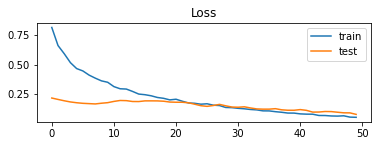

In [25]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training


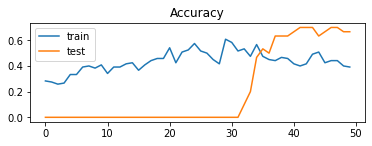

In [26]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.plot(hist.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [28]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [31]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(yo, yp)

cm 

array([[93,  0],
       [ 7,  0]], dtype=int64)

In [29]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yo, yp)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yo, yp,zero_division=1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yo, yp)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yo, yp)

Accuracy: 0.930000
Precision: 1.000000
Recall: 0.000000


No handles with labels found to put in legend.


false negatives: 28out of 100
false positives: 121out of 150


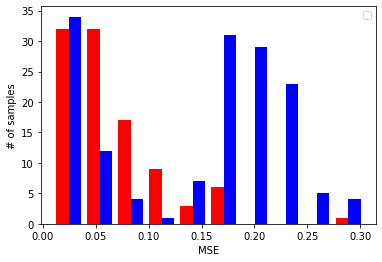

In [11]:
THRESHOLD = 0.03

predictions = autoEncoder.predict(X_anomaly)
mseSeizure = np.mean(np.power(X_anomaly - predictions, 2), axis=1)
print ("false negatives: " + str(np.sum(mseSeizure < THRESHOLD)) + "out of " + str(mseSeizure.shape[0]))

predictions = autoEncoder.predict(X_test)
mseNormal = np.mean(np.power(X_test - predictions, 2), axis=1)
print ("false positives: " + str(np.sum(mseNormal > THRESHOLD)) + "out of " + str(mseNormal.shape[0]))

plt.hist([mseSeizure, mseNormal], color=["red", "blue"])
plt.xlabel("MSE")
plt.ylabel("# of samples")
plt.legend()
plt.show()

In [ ]:
#acuurcy=80 precent